In [1]:
import pandas as pd
from data_funcs import from_json
import matplotlib.pyplot as plt

In [2]:
rnn = from_json("rnn_errs.json")
kf = from_json("kf_errs.json")

reading  rnn_errs.json
filename = rnn_errs.json   <class 'str'>
title not present
note not present
hours not present
h2 not present
case not present
E not present
Ed not present
Ew not present
Ec not present
rain not present
fm not present
m not present
items: ['CNFC1_202401', 'CRVC1_202401', 'FCHC1_202401', 'FTNC1_202401', 'HTRC1_202401', 'KRNC1_202401', 'MPOC1_202401', 'MKEC1_202401', 'MCFC1_202401', 'PRGC1_202401', 'SHQC1_202401', 'WVTC1_202401', 'WWRC1_202401', 'KYCN2_202401', 'MTSN2_202401', 'MTTC1_202401', 'BKRC1_202401', 'JSNC1_202401', 'MTQC1_202401', 'NFRC1_202401', 'OORC1_202401', 'UHLC1_202401', 'PHRC1_202401', 'WALC1_202401', 'UBCC1_202401', 'BSNC1_202401', 'CGVC1_202401', 'DKYC1_202401', 'FNWC1_202401', 'PRHC1_202401', 'MMTC1_202401', 'TR172_202401', 'OVRC1_202401', 'RCEC1_202401', 'SHVC1_202401', 'TRMC1_202401', 'MIAC1_202401', 'HSQC1_202401', 'MOLC1_202401', 'DEMC1_202401', 'DWRN2_202401', 'JSDC1_202401', 'BPOC1_202401', 'GALN2_202401', 'BKGC1_202401', 'YCGN2_202401', 'P

In [3]:
# Remove "filename" key
del rnn['filename']
del kf['filename']

In [4]:
# Prepare lists to store the extracted values
cases = []
predictions = []

# Iterate through the dictionary to extract the needed values
for key, value in rnn.items():
    cases.append(value['case'])
    predictions.append(value['errs']['prediction'])

# Create the DataFrame
df1 = pd.DataFrame({
    'case': cases,
    'prediction': predictions
})


In [5]:
df1

,case,prediction
0,CNFC1_202401,5.274385
1,CRVC1_202401,1.218359
2,FCHC1_202401,3.768300
3,FTNC1_202401,5.048487
4,HTRC1_202401,12.824523
...,...,...
214,BLFPN_202401,18.004872
215,PWLPN_202401,12.533222
216,PVRPN_202401,21.700139
217,WDLPN_202401,30.754891


In [6]:
df2 = pd.DataFrame.from_dict(kf).transpose()
df2.head()

,case,errs
CNFC1_202401,CNFC1_202401,6.043064
CRVC1_202401,CRVC1_202401,5.552094
FCHC1_202401,FCHC1_202401,3.622217
FTNC1_202401,FTNC1_202401,3.552326
HTRC1_202401,HTRC1_202401,2.339361


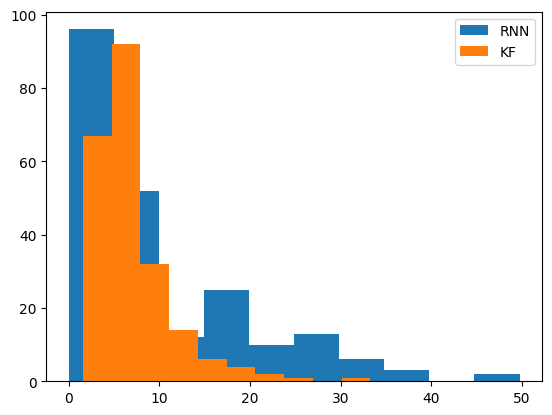

In [7]:
plt.hist(df1.prediction, label = "RNN")
plt.hist(df2.errs, label = "KF")
plt.legend()

In [8]:
print(df1.prediction.mean())
print(df1.prediction.median())

9.822807195225929
5.3876207398741665


In [9]:
print(df2.errs.mean())
print(df2.errs.median())

7.01267099225097
5.955908450009303
